In [96]:
import matplotlib.pyplot as plt
import math

In [97]:
def log(i, x, f_val):
    print(f"iter: {i+1}, x: {x:2.6f}, f(x): {f_val:2.6f}")


def get_fixed_point(algo, x0, eps=0.001, max_iter=100):
    x = x0
    errors = []
    for i in range(max_iter):
        x_next = algo(x)
        log(i, x_next, algo(x_next))
        errors.append(abs(x_next - x))
        if abs(x_next - x) < eps:
            return x_next, errors
        x = x_next
    print("!!Did not converge max iterations.")
    return x, errors


def get_bisection(point, func, eps=0.001, max_iter=100):
    a, b = point
    errors = []
    for i in range(max_iter):
        c = (a + b) / 2.0
        f_val = func(c)
        log(i, c, f_val)

        if func(a) * func(c) < 0:
            b = c
        elif func(c) * func(b) < 0:
            a = c
        else:
            if func(a) == 0:
                c = a
            elif func(b) == 0:
                c = b
        errors.append(abs(b - a))
        if abs(f_val) < eps or abs(b - a) < eps:
            print("Converged")
            return c, errors

    print("!!Did not converge max iterations.")
    return (a + b) / 2.0, errors

def plot_convergence(errors_fp, errors_nw, errors_bs, fx):
    plt.figure(figsize=(10, 6))
    plt.plot(
        range(len(errors_fp)),
        errors_fp,
        'r-o',
        label='Relaxation Fixed Point',
    )
    plt.plot(
        range(len(errors_nw)),
        errors_nw,
        'b-s',
        label='Newton',
    )
    plt.plot(
        range(len(errors_bs)),
        errors_bs,
        'g-^',
        label='Bisection',
    )
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.title(f'Convergence Comparison: {fx}')
    plt.legend()
    plt.yscale('log')
    plt.grid(True)
    plt.show()

In [98]:
a, b = (0, 3)
f = lambda x: x**2 - 4
f_prime = lambda x: 2*x
x0 = 3.0
alp = -1/10
eps = 0.001
max_iter = 200

Relaxation fixed point algorithm
iter: 1, x: 2.500000, f(x): 2.275000
iter: 2, x: 2.275000, f(x): 2.157437
iter: 3, x: 2.157437, f(x): 2.091984
iter: 4, x: 2.091984, f(x): 2.054344
iter: 5, x: 2.054344, f(x): 2.032311
iter: 6, x: 2.032311, f(x): 2.019282
iter: 7, x: 2.019282, f(x): 2.011532
iter: 8, x: 2.011532, f(x): 2.006906
iter: 9, x: 2.006906, f(x): 2.004139
iter: 10, x: 2.004139, f(x): 2.002482
iter: 11, x: 2.002482, f(x): 2.001488
iter: 12, x: 2.001488, f(x): 2.000893
Newton algorithm
iter: 1, x: 2.166667, f(x): 2.006410
iter: 2, x: 2.006410, f(x): 2.000010
iter: 3, x: 2.000010, f(x): 2.000000
iter: 4, x: 2.000000, f(x): 2.000000
Bisection algorithm
iter: 1, x: 1.500000, f(x): -1.750000
iter: 2, x: 2.250000, f(x): 1.062500
iter: 3, x: 1.875000, f(x): -0.484375
iter: 4, x: 2.062500, f(x): 0.253906
iter: 5, x: 1.968750, f(x): -0.124023
iter: 6, x: 2.015625, f(x): 0.062744
iter: 7, x: 1.992188, f(x): -0.031189
iter: 8, x: 2.003906, f(x): 0.015640
iter: 9, x: 1.998047, f(x): -0.0078

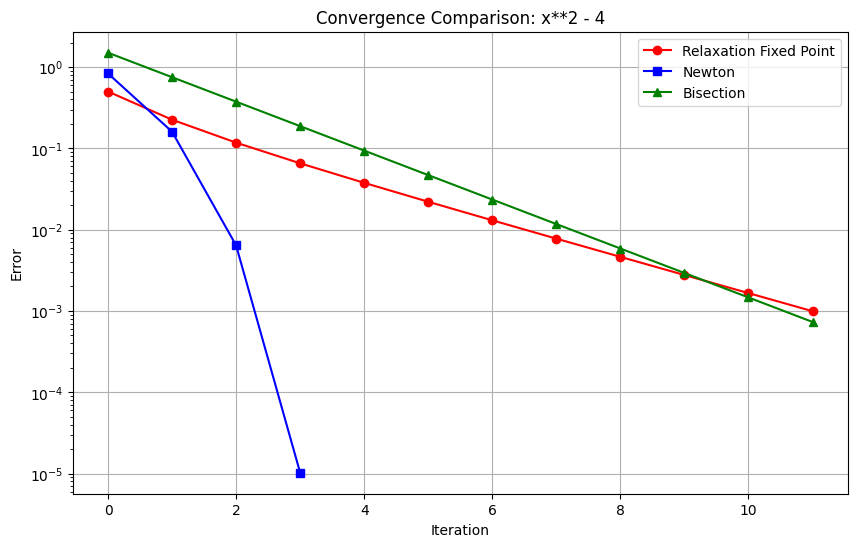

In [99]:
print("Relaxation fixed point algorithm")
root_fp, errors_fp = get_fixed_point(
    algo=lambda x: x + (alp * f(x)),
    x0=x0,
    eps=eps,
)

# newton algorithm
print("Newton algorithm")
root_nw, errors_nw = get_fixed_point(
    algo=lambda x: x - f(x) / f_prime(x),
    x0=x0,
    eps=eps,
)

# bisection algorithm
print("Bisection algorithm")
root_bs, errors_bs = get_bisection(
    point=(a, b),
    func=f,
    eps=eps,
)

plot_convergence(errors_fp, errors_nw, errors_bs, 'x**2 - 4')

In [100]:
a, b = (-1, 2)
f = lambda x: math.cos(x) - x
f_prime = lambda x: -math.sin(x) - 1
x0 = 2.0
alp = 0.3
eps = 1e-6
max_iter = 200

Relaxation fixed point algorithm
iter: 1, x: 1.275156, f(x): 0.980015
iter: 2, x: 0.980015, f(x): 0.853113
iter: 3, x: 0.853113, f(x): 0.794472
iter: 4, x: 0.794472, f(x): 0.766329
iter: 5, x: 0.766329, f(x): 0.752569
iter: 6, x: 0.752569, f(x): 0.745779
iter: 7, x: 0.745779, f(x): 0.742413
iter: 8, x: 0.742413, f(x): 0.740741
iter: 9, x: 0.740741, f(x): 0.739909
iter: 10, x: 0.739909, f(x): 0.739495
iter: 11, x: 0.739495, f(x): 0.739289
iter: 12, x: 0.739289, f(x): 0.739187
iter: 13, x: 0.739187, f(x): 0.739136
iter: 14, x: 0.739136, f(x): 0.739110
iter: 15, x: 0.739110, f(x): 0.739098
iter: 16, x: 0.739098, f(x): 0.739091
iter: 17, x: 0.739091, f(x): 0.739088
iter: 18, x: 0.739088, f(x): 0.739087
iter: 19, x: 0.739087, f(x): 0.739086
iter: 20, x: 0.739086, f(x): 0.739086
Newton algorithm
iter: 1, x: 0.734536, f(x): 0.739090
iter: 2, x: 0.739090, f(x): 0.739085
iter: 3, x: 0.739085, f(x): 0.739085
iter: 4, x: 0.739085, f(x): 0.739085
Bisection algorithm
iter: 1, x: 0.500000, f(x): 0.3

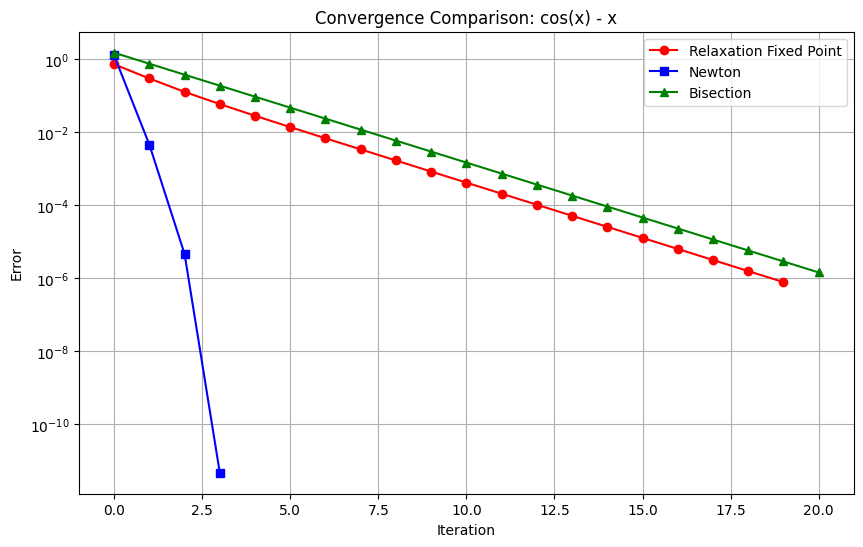

In [101]:
print("Relaxation fixed point algorithm")
root_fp, errors_fp = get_fixed_point(
    algo=lambda x: x + (alp * f(x)),
    x0=x0,
    eps=eps,
)

# newton algorithm
print("Newton algorithm")
root_nw, errors_nw = get_fixed_point(
    algo=lambda x: x - f(x) / f_prime(x),
    x0=x0,
    eps=eps,
)

# bisection algorithm
print("Bisection algorithm")
root_bs, errors_bs = get_bisection(
    point=(a, b),
    func=f,
    eps=eps,
)

plot_convergence(errors_fp, errors_nw, errors_bs, 'cos(x) - x')

In [102]:
a, b = (-0.9, 3)
f = lambda x: (x - 1) ** 3
f_prime = lambda x: 3 * (x - 1) ** 2
x0 = 3.0
alp = -0.05
eps = 1e-6
max_iter = 200

Relaxation fixed point algorithm
iter: 1, x: 2.600000, f(x): 2.395200
iter: 2, x: 2.395200, f(x): 2.259406
iter: 3, x: 2.259406, f(x): 2.159529
iter: 4, x: 2.159529, f(x): 2.081579
iter: 5, x: 2.081579, f(x): 2.018317
iter: 6, x: 2.018317, f(x): 1.965519
iter: 7, x: 1.965519, f(x): 1.920515
iter: 8, x: 1.920515, f(x): 1.881515
iter: 9, x: 1.881515, f(x): 1.847265
iter: 10, x: 1.847265, f(x): 1.816854
iter: 11, x: 1.816854, f(x): 1.789602
iter: 12, x: 1.789602, f(x): 1.764987
iter: 13, x: 1.764987, f(x): 1.742603
iter: 14, x: 1.742603, f(x): 1.722128
iter: 15, x: 1.722128, f(x): 1.703299
iter: 16, x: 1.703299, f(x): 1.685906
iter: 17, x: 1.685906, f(x): 1.669771
iter: 18, x: 1.669771, f(x): 1.654748
iter: 19, x: 1.654748, f(x): 1.640714
iter: 20, x: 1.640714, f(x): 1.627563
iter: 21, x: 1.627563, f(x): 1.615205
iter: 22, x: 1.615205, f(x): 1.603563
iter: 23, x: 1.603563, f(x): 1.592569
iter: 24, x: 1.592569, f(x): 1.582166
iter: 25, x: 1.582166, f(x): 1.572300
iter: 26, x: 1.572300, f(x

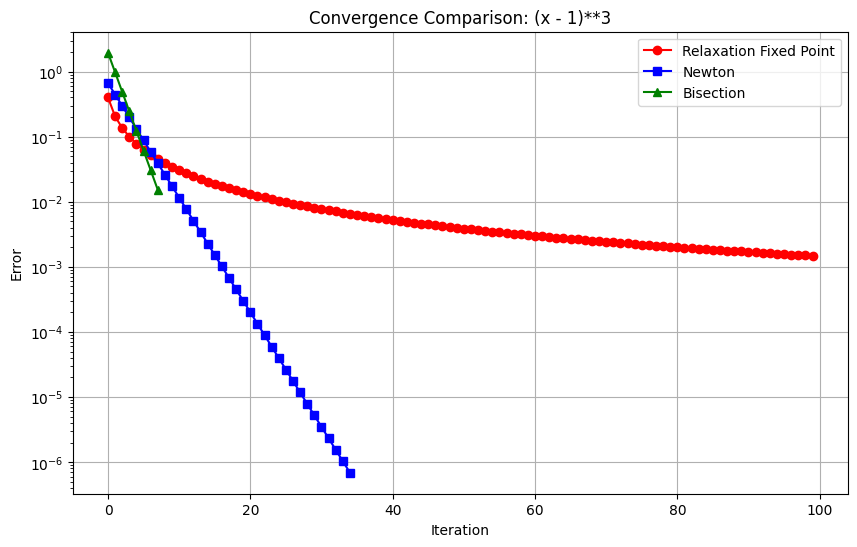

In [103]:
print("Relaxation fixed point algorithm")
root_fp, errors_fp = get_fixed_point(
    algo=lambda x: x + (alp * f(x)),
    x0=x0,
    eps=eps,
)

# newton algorithm
print("Newton algorithm")
root_nw, errors_nw = get_fixed_point(
    algo=lambda x: x - f(x) / f_prime(x),
    x0=x0,
    eps=eps,
)

# bisection algorithm
print("Bisection algorithm")
root_bs, errors_bs = get_bisection(
    point=(a, b),
    func=f,
    eps=eps,
)

plot_convergence(errors_fp, errors_nw, errors_bs, '(x - 1)**3')